# Iniciando o programa
Aqui definimos funções para plotar os pontos e para imprimir os pontos.
Perceba que o ponto é definido em coordenadas homogênas.

(X,Y): (1,1)
(X,Y): (1,2)
(X,Y): (2,1)
(X,Y): (2,2)


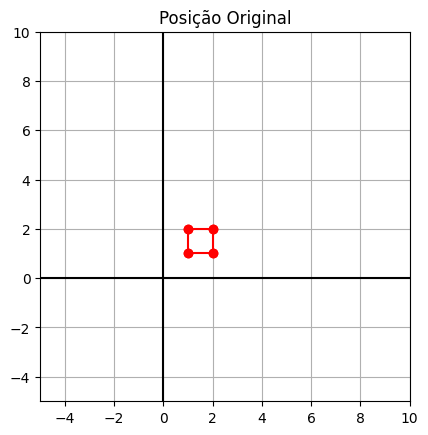

In [17]:
import numpy as np
import matplotlib.pyplot as plt


def printarPontos(pontos):
    for ponto in pontos:
        print('(X,Y): ({},{})'.format(int(ponto[0]), int(ponto[1])))


def plotarPontos(pontos, title):
    plt.axis([-5, 10, -5, 10])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid()
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')

    plt.plot([pontos[0][0], pontos[1][0]], [pontos[0][1], pontos[1][1]], 'ro-')
    plt.plot([pontos[1][0], pontos[3][0]], [pontos[1][1], pontos[3][1]], 'ro-')
    plt.plot([pontos[3][0], pontos[2][0]], [pontos[3][1], pontos[2][1]], 'ro-')
    plt.plot([pontos[2][0], pontos[0][0]], [pontos[2][1], pontos[0][1]], 'ro-')

    plt.title(title)
    plt.show()


ponto = np.array([[1],
                  [1],
                  [1]], dtype=object)
ponto2 = np.array([[1],
                   [2],
                   [1]], dtype=object)
ponto3 = np.array([[2],
                   [1],
                   [1]], dtype=object)
ponto4 = np.array([[2],
                   [2],
                   [1]], dtype=object)

pontos = np.array([ponto, ponto2, ponto3, ponto4])

printarPontos(pontos)
plotarPontos(pontos, "Posição Original")

### Transladando um ponto
Vamos agora deslocar o conjunto de pontos em (2,2).
Espera-se que os pontos sejam deslocados para a direita e para cima.

(X,Y): (3,3)
(X,Y): (3,4)
(X,Y): (4,3)
(X,Y): (4,4)


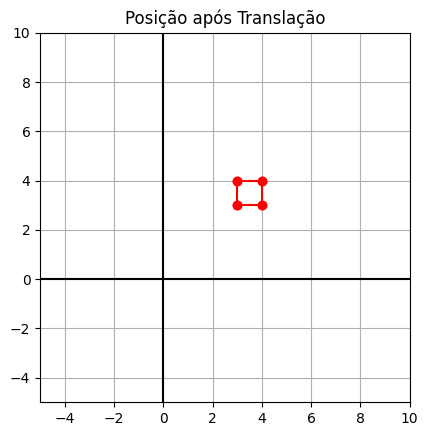

In [18]:
def translacao(ponto, tx, ty):
    matriz_translacao = np.array([[1, 0, tx],
                                  [0, 1, ty],
                                  [0, 0, 1]], dtype=object)

    return np.dot(matriz_translacao, ponto)


_pontos = []
for ponto in pontos:
    _pontos.append(translacao(ponto, 2, 2))

printarPontos(_pontos)
plotarPontos(_pontos, "Posição após Translação")

### Escalando um ponto
Vamos agora escalar o conjunto de pontos em (2,2).
Faremos isso de 3 maneiras distintas.7

1. Escalando o ponto usando a função primitiva
2. Escalando o ponto usando a função de escala em relação a um ponto, utilizaremos o ponto (3,3) neste caso.
3. Escalando o ponto usando a função de escala em relação ao centro geométrico do conjunto de pontos.

(X,Y): (2,2)
(X,Y): (2,4)
(X,Y): (4,2)
(X,Y): (4,4)


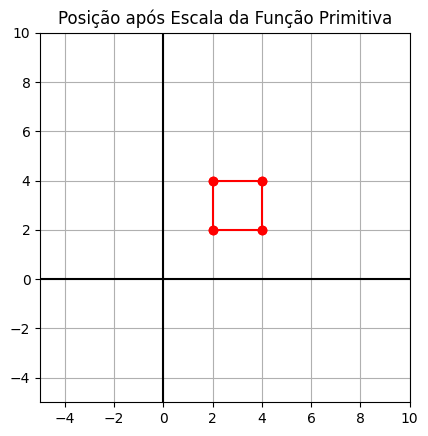

In [19]:
def escala(ponto, sx, sy):
    matriz_escala = np.array([[sx, 0, 0],
                              [0, sy, 0],
                              [0, 0, 1]], dtype=object)

    return np.dot(matriz_escala, ponto)


_pontos = []
for ponto in pontos:
    _pontos.append(escala(ponto, 2, 2))

printarPontos(_pontos)
plotarPontos(_pontos, "Posição após Escala da Função Primitiva")

(X,Y): (0,0)
(X,Y): (0,2)
(X,Y): (2,0)
(X,Y): (2,2)


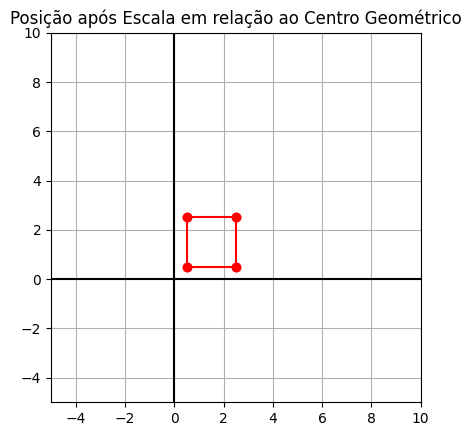

In [20]:
def escalaCentroGeometrico(ponto, centro, sx, sy):
    matriz_translacao = np.array([[1, 0, centro[0]],
                                  [0, 1, centro[1]],
                                  [0, 0, 1]], dtype=object)

    matriz_escala = np.array([[sx, 0, 0],
                              [0, sy, 0],
                              [0, 0, 1]], dtype=object)

    matriz_translacao_inversa = np.array([[1, 0, -centro[0]],
                                          [0, 1, -centro[1]],
                                          [0, 0, 1]], dtype=object)

    matriz_composta = np.dot(matriz_translacao, np.dot(matriz_escala, matriz_translacao_inversa))

    return np.dot(matriz_composta, ponto)


_pontos = []
centro = [0, 0]
for ponto in pontos:
    centro[0] += ponto[0]
    centro[1] += ponto[1]

centro[0] /= 4
centro[1] /= 4

for ponto in pontos:
    _pontos.append(escalaCentroGeometrico(ponto, centro, 2, 2))

printarPontos(_pontos)
plotarPontos(_pontos, "Posição após Escala em relação ao Centro Geométrico")

(X,Y): (-1,-1)
(X,Y): (-1,1)
(X,Y): (1,-1)
(X,Y): (1,1)


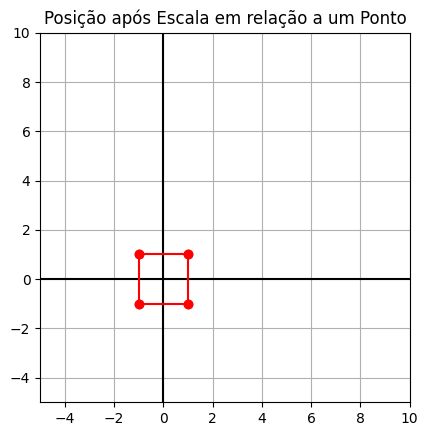

In [21]:
def escalaPonto(ponto, referencia, sx, sy):
    matriz_translacao = np.array([[1, 0, referencia[0]],
                                  [0, 1, referencia[1]],
                                  [0, 0, 1]], dtype=object)

    matriz_escala = np.array([[sx, 0, 0],
                              [0, sy, 0],
                              [0, 0, 1]], dtype=object)

    matriz_translacao_inversa = np.array([[1, 0, -referencia[0]],
                                          [0, 1, -referencia[1]],
                                          [0, 0, 1]], dtype=object)

    matriz_composta = np.dot(matriz_translacao, np.dot(matriz_escala, matriz_translacao_inversa))

    return np.dot(matriz_composta, ponto)


_pontos = []
for ponto in pontos:
    _pontos.append(escalaPonto(ponto, [3, 3], 2, 2))

printarPontos(_pontos)
plotarPontos(_pontos, "Posição após Escala em relação a um Ponto")

### Rotacionando um ponto
Vamos agora rotacionar o conjunto de pontos em 45 graus. Os ângulos serão em radianos.
Faremos isso de 2 maneiras distintas.

1. Rotacionando o ponto usando a função primitiva
2. Rotacionando o ponto usando a função de rotação em relação a um ponto, utilizaremos o ponto (1,1) neste caso.

(X,Y): (0,1)
(X,Y): (0,2)
(X,Y): (0,2)
(X,Y): (0,2)


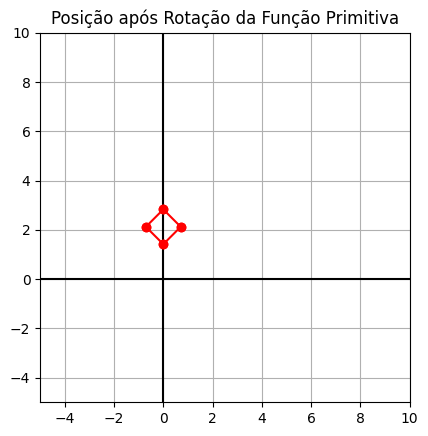

In [22]:
def rotacao(ponto, angulo):
    matriz_rotacao = np.array([[np.cos(angulo), -np.sin(angulo), 0],
                               [np.sin(angulo), np.cos(angulo), 0],
                               [0, 0, 1]], dtype=object)

    return np.dot(matriz_rotacao, ponto)


_pontos = []
for ponto in pontos:
    _pontos.append(rotacao(ponto, np.pi / 4))

printarPontos(_pontos)
plotarPontos(_pontos, "Posição após Rotação da Função Primitiva")

(X,Y): (1,1)
(X,Y): (0,1)
(X,Y): (1,1)
(X,Y): (1,2)


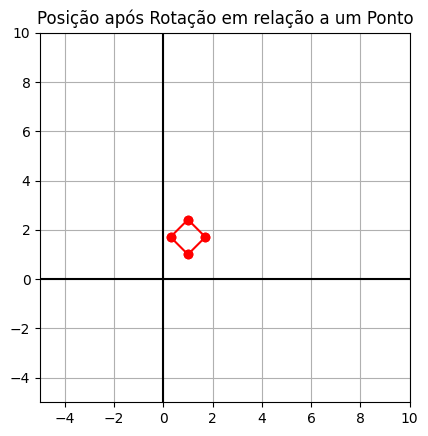

In [23]:
def rotacaoPonto(ponto, referencia, angulo):
    matriz_translacao = np.array([[1, 0, referencia[0]],
                                  [0, 1, referencia[1]],
                                  [0, 0, 1]], dtype=object)

    matriz_rotacao = np.array([[np.cos(angulo), -np.sin(angulo), 0],
                               [np.sin(angulo), np.cos(angulo), 0],
                               [0, 0, 1]], dtype=object)

    matriz_translacao_inversa = np.array([[1, 0, -referencia[0]],
                                          [0, 1, -referencia[1]],
                                          [0, 0, 1]], dtype=object)

    matriz_composta = np.dot(matriz_translacao, np.dot(matriz_rotacao, matriz_translacao_inversa))

    return np.dot(matriz_composta, ponto)


_pontos = []
for ponto in pontos:
    _pontos.append(rotacaoPonto(ponto, [1, 1], np.pi / 4))

printarPontos(_pontos)
plotarPontos(_pontos, "Posição após Rotação em relação a um Ponto")


### Cisalhamento
Vamos agora aplicar a função de cisalhamento com os valores de (2,0)

(X,Y): (3,1)
(X,Y): (5,2)
(X,Y): (4,1)
(X,Y): (6,2)


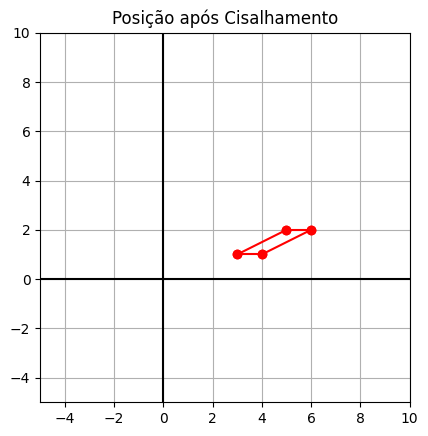

In [24]:
def cisalhamento(ponto, cx, cy):
    matriz_cisalhamento = np.array([[1, cx, 0],
                                    [cy, 1, 0],
                                    [0, 0, 1]], dtype=object)

    return np.dot(matriz_cisalhamento, ponto)


_pontos = []
for ponto in pontos:
    _pontos.append(cisalhamento(ponto, 2, 0))

printarPontos(_pontos)
plotarPontos(_pontos, "Posição após Cisalhamento")

### Reflexão
Vamos agora refletir o conjunto de pontos.
Faremos isso de 4 maneiras distintas.

1. Refletindo o ponto no eixo X
2. Refletindo o ponto no eixo Y
3. Refletindo o ponto em relação à linha y = x
4. Refletindo o ponto em relação à linha y = -x

(X,Y): (1,-1)
(X,Y): (1,-2)
(X,Y): (2,-1)
(X,Y): (2,-2)


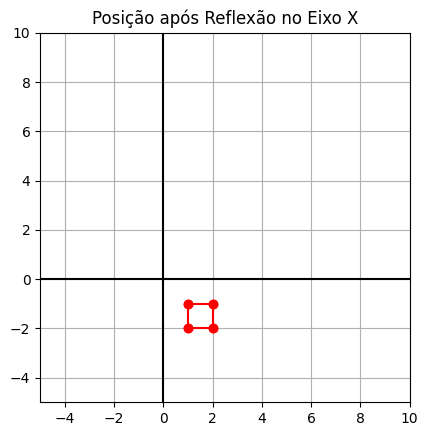

In [26]:
def reflexaoEixo(ponto, eixo='x'):
    if eixo == 'x':
        matriz_reflexao = np.array([[1, 0, 0],
                                    [0, -1, 0],
                                    [0, 0, 1]], dtype=object)
    ## Y
    else:
        matriz_reflexao = np.array([[-1, 0, 0],
                                    [0, 1, 0],
                                    [0, 0, 1]], dtype=object)

    return np.dot(matriz_reflexao, ponto)


_pontos = []
for ponto in pontos:
    _pontos.append(reflexaoEixo(ponto, 'x'))

printarPontos(_pontos)
plotarPontos(_pontos, "Posição após Reflexão no Eixo X")

(X,Y): (-1,1)
(X,Y): (-1,2)
(X,Y): (-2,1)
(X,Y): (-2,2)


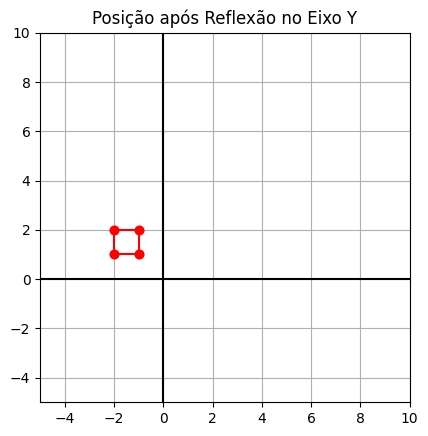

In [27]:
_pontos = []
for ponto in pontos:
    _pontos.append(reflexaoEixo(ponto, 'y'))

printarPontos(_pontos)
plotarPontos(_pontos, "Posição após Reflexão no Eixo Y")

(X,Y): (1,1)
(X,Y): (2,1)
(X,Y): (1,2)
(X,Y): (2,2)


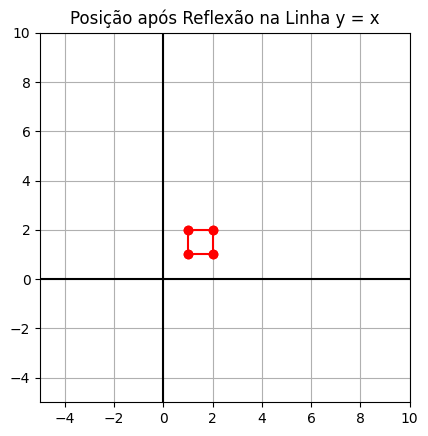

In [28]:
def reflexaoLinha(ponto, linha='x'):
    if linha == 'x':
        matriz_reflexao = np.array([[0, 1, 0],
                                    [1, 0, 0],
                                    [0, 0, 1]], dtype=object)
    ## -X
    else:
        matriz_reflexao = np.array([[0, -1, 0],
                                    [-1, 0, 0],
                                    [0, 0, 1]], dtype=object)

    return np.dot(matriz_reflexao, ponto)

_pontos = []
for ponto in pontos:
    _pontos.append(reflexaoLinha(ponto, 'x'))

printarPontos(_pontos)
plotarPontos(_pontos, "Posição após Reflexão na Linha y = x")

(X,Y): (-1,-1)
(X,Y): (-2,-1)
(X,Y): (-1,-2)
(X,Y): (-2,-2)


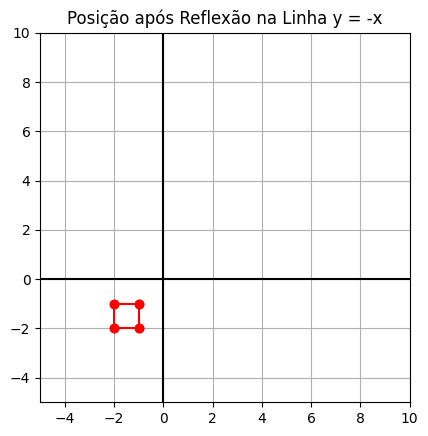

In [30]:
_pontos = []
for ponto in pontos:
    _pontos.append(reflexaoLinha(ponto, '-x'))

printarPontos(_pontos)
plotarPontos(_pontos, "Posição após Reflexão na Linha y = -x")